In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Loading the Iris dataset
data = load_iris()

# Converting the dataset into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Including the target column temporarily for reference

# Droping the 'target' column because we are solving a clustering problem
df = df.drop('target', axis=1)

# Display the first few rows of the data
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
A) KMeans Clustering:
KMeans clustering is a method that divides data into a set number of groups, called clusters. It works by assigning each data point to the cluster whose center, or "centroid," is closest, and then repeatedly adjusts these centroids until the clusters stabilize.
This approach is particularly effective for the Iris dataset, as we already know there are three distinct species (clusters). The data itself is well-organized, with clear separations between the species, so KMeans can easily identify and form these distinct groups.


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


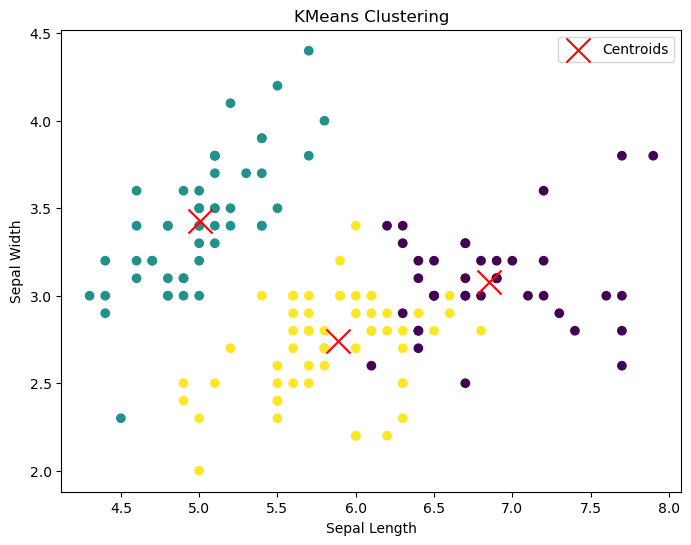

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We know there are 3 species in Iris dataset
kmeans.fit(df)

# Getting the cluster labels and the cluster centers
df['kmeans_labels'] = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_labels'], cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [ ]:
B) Hierarchical Clustering
Hierarchical clustering is a method that creates a tree-like structure of clusters. It can be done in two ways: agglomerative (bottom-up) or divisive (top-down). In agglomerative clustering, each data point starts as its own individual cluster, and then the algorithm gradually merges the closest clusters step by step.
This method is particularly useful for the Iris dataset because it doesn't require us to decide how many clusters we need in advance. Additionally, it generates a dendrogram, a tree diagram that visually shows how the clusters are related to each other, which can be very helpful for understanding the structure of the data.

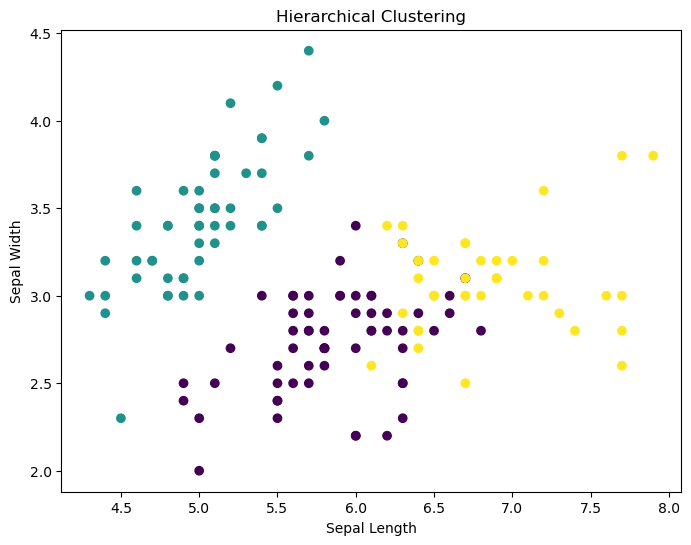

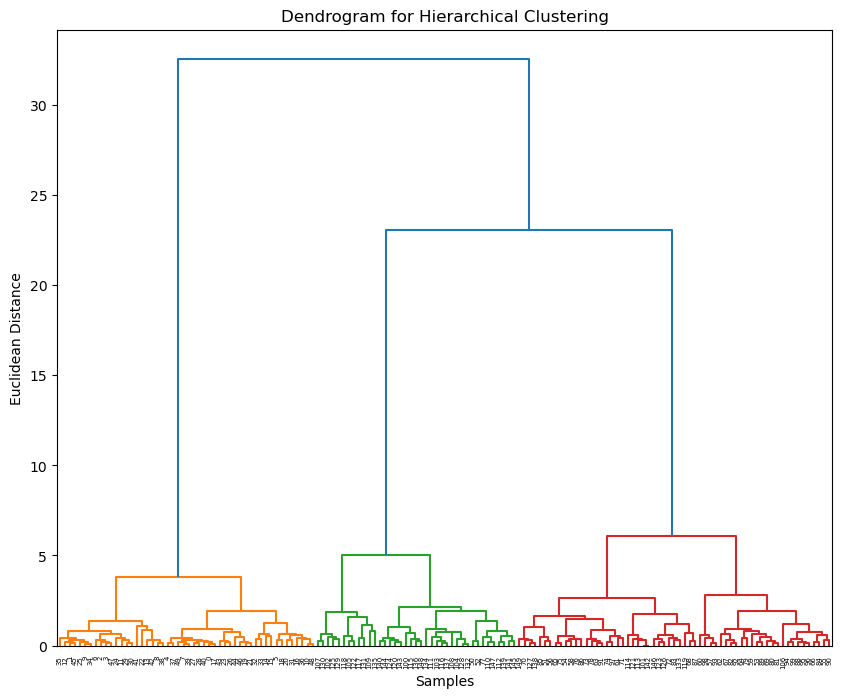

In [5]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Applying Agglomerative Hierarchical Clustering 
hierarchical = AgglomerativeClustering(n_clusters=3)  # We know there are 3 species
df['hierarchical_labels'] = hierarchical.fit_predict(df)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['hierarchical_labels'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Dendrogram
plt.figure(figsize=(10, 8))
sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()